<a href="https://colab.research.google.com/github/JorgeUgalde/Sistemas_Expertos_Ejercicios/blob/main/Lab4_JorgeUgalde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
biblioteca_babel = open('/content/drive/MyDrive/Colab Notebooks/la_biblioteca_de_babel.txt', 'r').read()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
biblioteca_babel_tk_sent = sent_tokenize(biblioteca_babel)
biblioteca_babel_tk_sent[:5] #se muestran las primeras cinco oraciones

['El universo (que otros llaman la Biblioteca) se compone de un número indefinido, y\ntal vez infinito, de galerías hexagonales, con vastos pozos de ventilación en el medio,\ncercados por barandas bajísimas.',
 'Desde cualquier hexágono se ven los pisos inferiores y\nsuperiores: interminablemente.',
 'La distribución de las galerías es invariable.',
 'Veinte\nanaqueles, a cinco largos anaqueles por lado, cubren todos los lados menos dos; su altura,\nque es la de los pisos, excede apenas la de un bibliotecario normal.',
 'Una de las caras libres\nda a un angosto zaguán, que desemboca en otra galería, idéntica a la primera y a todas.']

In [18]:
biblioteca_babel_tk_words = word_tokenize(biblioteca_babel)
biblioteca_babel_tk_words[:20] # se muestran los primeros veinte items

['El',
 'universo',
 '(',
 'que',
 'otros',
 'llaman',
 'la',
 'Biblioteca',
 ')',
 'se',
 'compone',
 'de',
 'un',
 'número',
 'indefinido',
 ',',
 'y',
 'tal',
 'vez',
 'infinito']

In [19]:
biblioteca_babel_tk_words = [word for word in biblioteca_babel_tk_words if word.isalnum()]
biblioteca_babel_tk_words[:20]

['El',
 'universo',
 'que',
 'otros',
 'llaman',
 'la',
 'Biblioteca',
 'se',
 'compone',
 'de',
 'un',
 'número',
 'indefinido',
 'y',
 'tal',
 'vez',
 'infinito',
 'de',
 'galerías',
 'hexagonales']

In [20]:
!pip install -U spacy

In [21]:
%%bash
python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
import spacy

nlp = spacy.load('es_core_news_lg')

doc = nlp(biblioteca_babel)
type(doc)

spacy.tokens.doc.Doc

In [23]:
spacy.tokens.doc.Doc

spacy.tokens.doc.Doc

In [24]:
biblioteca_babel_entities = [(tok.text, tok.label_) for tok in doc.ents if tok.label_ != 'MISC']
biblioteca_babel_entities

[('Biblioteca', 'LOC'),
 ('nací', 'LOC'),
 ('Razonan', 'LOC'),
 ('Básteme', 'LOC'),
 ('Otro', 'PER'),
 ('Biblioteca.', 'LOC'),
 ('Biblioteca', 'LOC'),
 ('Basilides', 'PER'),
 ('Beda', 'PER'),
 ('Tácito', 'PER'),
 ('Vindicaciones', 'PER'),
 ('Vindicación', 'LOC'),
 ('Las Vindicaciones', 'LOC'),
 ('Biblioteca', 'LOC'),
 ('Visiblemente', 'PER'),
 ('Invadían', 'PER'),
 ('Biblioteca', 'LOC'),
 ('Purificadores', 'ORG'),
 ('Él', 'PER'),
 ('Biblioteca', 'LOC'),
 ('Orden', 'ORG')]

In [25]:
for tok in doc.ents:
    if tok.label_ == 'PER':
        print(tok.text, tok.label_)

Otro PER
Basilides PER
Beda PER
Tácito PER
Vindicaciones PER
Visiblemente PER
Invadían PER
Él PER


In [26]:
for sent in biblioteca_babel_tk_sent:
    if 'Ajá' in sent:
        print(sent)

In [27]:
biblioteca_babel_pers = [tok for tok in doc.ents if tok.label_ == 'PER' and 'Ajá' not in tok.text]
for tok in biblioteca_babel_pers:
    print(tok.text, tok.label_)

Otro PER
Basilides PER
Beda PER
Tácito PER
Vindicaciones PER
Visiblemente PER
Invadían PER
Él PER


In [28]:
from collections import Counter

biblioteca_babel_names = [tok.text for tok in doc.ents if tok.label_ == 'PER' and 'Ajá' not in tok.text]
pers_counter = Counter(biblioteca_babel_names)
pers_counter = list(reversed(pers_counter.most_common()))
pers_counter

[('Él', 1),
 ('Invadían', 1),
 ('Visiblemente', 1),
 ('Vindicaciones', 1),
 ('Tácito', 1),
 ('Beda', 1),
 ('Basilides', 1),
 ('Otro', 1)]

In [29]:
names = [name for name, count in pers_counter]
count = [count for name, count in pers_counter]

In [30]:
import matplotlib.pyplot as plt

In [32]:
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install Morfessor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52561 sha256=aa4e3a1d276e911a8cfb67aa54680056e97a8b66f4b54631671362d129169840
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=PyICU-2.13.1-cp310-cp310-linux_x86_64.whl size=1801398 sha256=6861078e2e6e80bbe37cbc4439889d41bb2de45688e57aa2767a4f4a84f4cce2
  Stored in directory: /root/.cache/pip/wheels/8e/45/08/f4bc505e31eb7bb779d493226921abf18cf55ed30142e70eae
Successfully built pyicu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 16.1 MB/s et

In [33]:
import polyglot
from polyglot.downloader import downloader
from polyglot.text import Text


In [34]:
%%bash
polyglot download embeddings2.es pos2.es ner2.es

[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package pos2.es to /root/polyglot_data...
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...


In [35]:
text = Text(biblioteca_babel)
type(text)

polyglot.text.Text

In [36]:
text.pos_tags[:20] #se muestran los primeros veinte items

[('El', 'DET'),
 ('universo', 'NOUN'),
 ('(', 'PUNCT'),
 ('que', 'SCONJ'),
 ('otros', 'PRON'),
 ('llaman', 'VERB'),
 ('la', 'DET'),
 ('Biblioteca', 'NOUN'),
 (')', 'PUNCT'),
 ('se', 'PRON'),
 ('compone', 'VERB'),
 ('de', 'ADP'),
 ('un', 'DET'),
 ('número', 'NOUN'),
 ('indefinido', 'ADJ'),
 (',', 'PUNCT'),
 ('y', 'CONJ'),
 ('tal', 'ADJ'),
 ('vez', 'NOUN'),
 ('infinito', 'ADJ')]

In [37]:
biblioteca_babel_tags = [(word, tag) for (word, tag) in text.pos_tags if tag !='PUNCT']
biblioteca_babel_tags_count = list(Counter(biblioteca_babel_tags).most_common())
biblioteca_babel_tags_count[:10] #se muestran los diez primeros ítems

[(('de', 'ADP'), 145),
 (('que', 'SCONJ'), 99),
 (('la', 'DET'), 73),
 (('y', 'CONJ'), 67),
 (('el', 'DET'), 63),
 (('los', 'DET'), 59),
 (('.', 'X'), 59),
 (('en', 'ADP'), 55),
 (('es', 'VERB'), 40),
 (('un', 'DET'), 38)]

In [38]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
from nltk.corpus import stopwords
stopwords.words('spanish')[:10] #se muestran los primeros diez items

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [40]:
stop_words = set(stopwords.words('spanish'))
punctuation = ['.', ',', ';', ':', '¿', '?', '¡', '!']
for sign in punctuation:
    stop_words.add(sign)
'!' and '¿' in stop_words

True

In [41]:
biblioteca_babel_tags = [(word, tag) for (word, tag) in text.pos_tags if tag !='PUNCT']
biblioteca_babel_tags = [(word, tag) for (word, tag) in biblioteca_babel_tags if word not in stop_words]
biblioteca_babel_tags_count = list(Counter(biblioteca_babel_tags).most_common())
biblioteca_babel_tags_count[:10] #se muestran los diez primeros ítems

[(('libros', 'NOUN'), 20),
 (('Biblioteca', 'NOUN'), 19),
 (('libro', 'NOUN'), 16),
 (('cada', 'DET'), 14),
 (('hexágono', 'NOUN'), 12),
 (('hombres', 'NOUN'), 10),
 (('La', 'DET'), 9),
 (('letras', 'NOUN'), 8),
 (('dos', 'NUM'), 7),
 (('algún', 'DET'), 7)]

In [42]:
tags = []
for (word, tag) in biblioteca_babel_tags:
    tags.append(tag)

tags_count = Counter(tags)
tags_count = list(reversed(tags_count.most_common()))
tags_count

[('SYM', 1),
 ('CONJ', 4),
 ('SCONJ', 7),
 ('PRON', 17),
 ('AUX', 20),
 ('ADP', 24),
 ('PROPN', 45),
 ('X', 46),
 ('ADV', 64),
 ('DET', 85),
 ('NUM', 95),
 ('ADJ', 229),
 ('VERB', 241),
 ('NOUN', 550)]

In [44]:
poly_tags = text.pos_tags
spacy_tags = [(token.text, token.pos_) for token in doc]

poly_tags == spacy_tags

False

In [45]:
print('Polyglot tags:')
for tag in poly_tags[:100]:
    if tag not in spacy_tags[:100]:
        print(tag)
print(f'\nspaCy tags:')
for tag in spacy_tags[:100]:
    if tag not in poly_tags[:100]:
        print(tag)

Polyglot tags:
('que', 'SCONJ')
('Biblioteca', 'NOUN')
('y', 'CONJ')
('tal', 'ADJ')
('cercados', 'VERB')
('barandas', 'X')
('bajísimas', 'X')
('y', 'CONJ')
('interminablemente', 'X')
('es', 'VERB')
('Veinte', 'PROPN')
('anaqueles', 'NUM')
('anaqueles', 'NUM')
('que', 'SCONJ')
('es', 'VERB')
('la', 'PRON')
('la', 'PRON')
('Una', 'SYM')
('caras', 'NOUN')
('libres', 'ADJ')

spaCy tags:
('que', 'PRON')
('Biblioteca', 'PROPN')
('y', 'CCONJ')
('\n', 'SPACE')
('tal', 'NOUN')
('\n', 'SPACE')
('cercados', 'ADJ')
('barandas', 'NOUN')
('bajísimas', 'ADJ')
('y', 'CCONJ')
('\n', 'SPACE')
('interminablemente', 'ADV')
('es', 'AUX')
('Veinte', 'NUM')
('\n', 'SPACE')
('anaqueles', 'NOUN')
('anaqueles', 'NOUN')
('\n', 'SPACE')
('que', 'PRON')
('es', 'AUX')


links de los Universal POS tags

1.   https://universaldependencies.org/docs/u/pos/index.html
2.   https://www.cs.upc.edu/~nlp/tools/parole-sp.html




In [46]:
!pip install sentiment-analysis-spanish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 38.9 MB/s eta 0:00:00


In [47]:
%%bash
polyglot download sentiment2.es

[polyglot_data] Downloading package sentiment2.es to
[polyglot_data]     /root/polyglot_data...


In [48]:
biblioteca_babel_poly_sentiment = []
for sentence in text.sentences:
    for ent in sentence.entities:
        if ent.tag == 'I-PER':
            try:
                positive = ent.positive_sentiment
                negative = ent.negative_sentiment
                entity_dict = {'entity': ent[0], 'positive': positive, 'negative': negative}
                biblioteca_babel_poly_sentiment.append(entity_dict)
                #print(f'{ent} positive sentiment: {ent.positive_sentiment}, negative sentiment: {ent.negative_sentiment}')
            except:
                pass
biblioteca_babel_poly_sentiment[:5] #se muestran los primeros cinco ítems

[{'entity': 'Básteme', 'positive': 0.7857142857142857, 'negative': 0},
 {'entity': 'cacofonías', 'positive': 0.7333333333333334, 'negative': 0},
 {'entity': 'MCV', 'positive': 0, 'negative': 1.025},
 {'entity': 'vastísimo', 'positive': 0, 'negative': 0.6842105263157895},
 {'entity': 'Beda', 'positive': 0, 'negative': 0.8055555555555556}]

In [49]:
import pandas as pd

df_poly_sentiment = pd.DataFrame(biblioteca_babel_poly_sentiment)
df_poly_sentiment.head()

,entity,positive,negative
0,Básteme,0.785714,0.000000
1,cacofonías,0.733333,0.000000
2,MCV,0.000000,1.025000
3,vastísimo,0.000000,0.684211
4,Beda,0.000000,0.805556


In [50]:
df_poly_sentiment['total'] = df_poly_sentiment['positive'] - df_poly_sentiment['negative']
df_poly_sentiment.head()

,entity,positive,negative,total
0,Básteme,0.785714,0.000000,0.785714
1,cacofonías,0.733333,0.000000,0.733333
2,MCV,0.000000,1.025000,-1.025000
3,vastísimo,0.000000,0.684211,-0.684211
4,Beda,0.000000,0.805556,-0.805556


In [52]:
from sentiment_analysis_spanish import sentiment_analysis

sentiment = sentiment_analysis.SentimentAnalysisSpanish()
sas_sentiment = []
for sentence in biblioteca_babel_tk_sent:
    polarity = sentiment.sentiment(sentence)
    sas_sentiment.append(polarity)
sas_sentiment[:5] #se muestran los primeros cinco ítems

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[0.006752578999420363,
 0.3352143498854951,
 0.4618263990446498,
 1.4688423434629752e-05,
 0.011390767363446479]

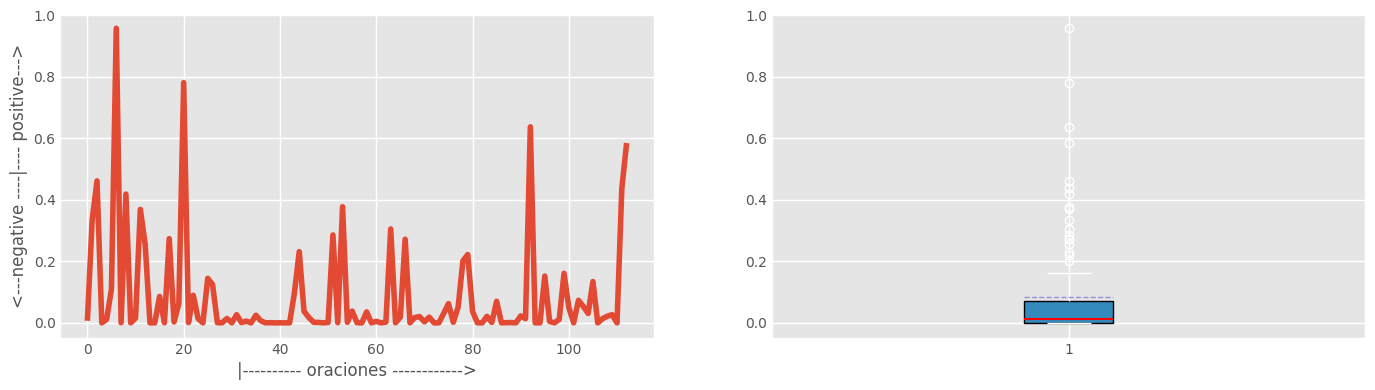

In [53]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
plot = plt.plot(sas_sentiment)
plt.xlabel('|---------- oraciones ------------>')
plt.ylabel('<---negative ----|---- positive--->')

plt.subplot(122)
boxplot  = plt.boxplot(sas_sentiment, showmeans=True, meanline=True,
                       patch_artist=True, boxprops={'color': 'black'},
                       medianprops={'color': 'red', 'linewidth': 1.5})
plt.style.use('ggplot')
plt.show()